# Decision Trees 🌳

In this notebook, I will:
- Load a real-world dataset (Iris)
- Train a Decision Tree Classifier
- Visualise the tree
- Evaluate its accuracy
- Discuss overfitting and pruning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

print("Feature names:", data.feature_names)
print("Target classes:", data.target_names)
print("Data shape:", X.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 120
Testing samples: 30


In [4]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Accuracy: 1.00


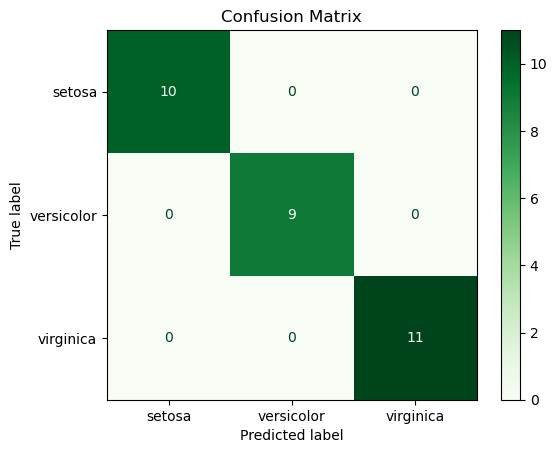

In [5]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap="Greens")
plt.title("Confusion Matrix")
plt.show()


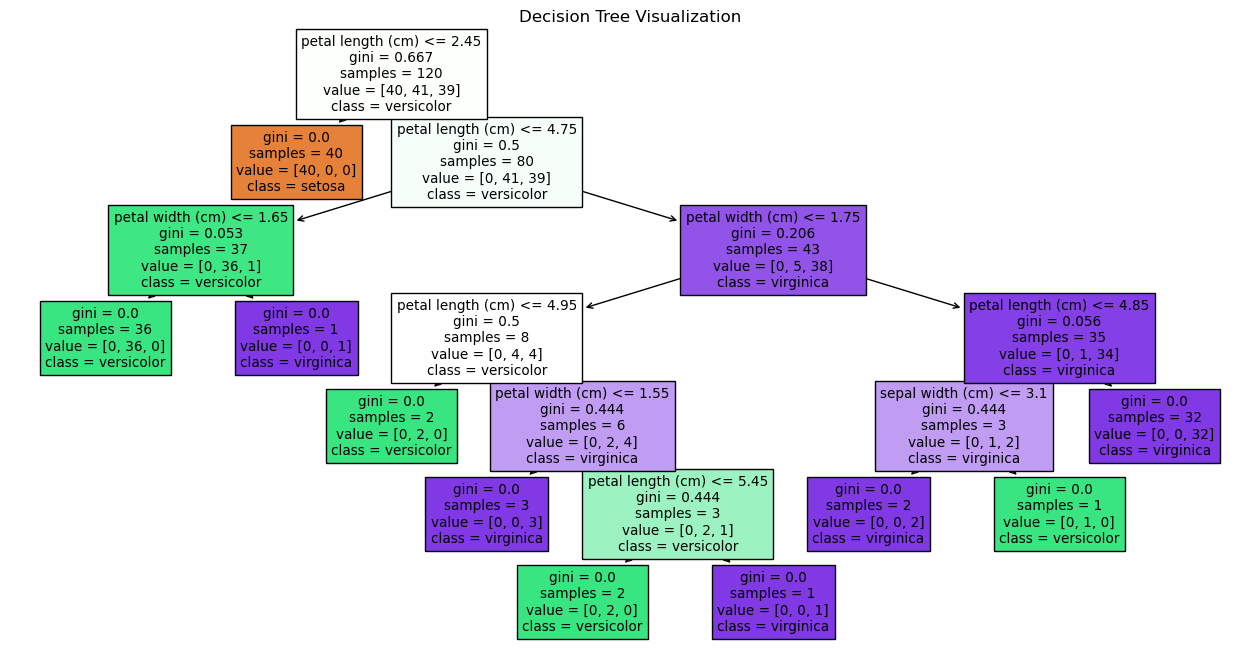

In [6]:
plt.figure(figsize=(16,8))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree Visualization")
plt.show()


In [7]:
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
model_pruned.fit(X_train, y_train)

y_pred_pruned = model_pruned.predict(X_test)
acc_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy after pruning (max_depth=3): {acc_pruned:.2f}")


Accuracy after pruning (max_depth=3): 1.00


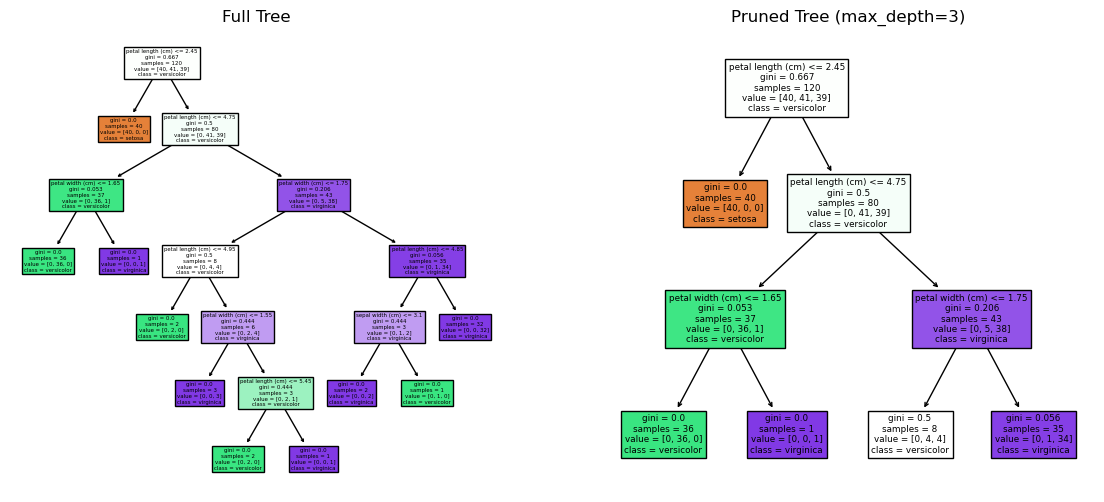

In [8]:
plt.figure(figsize=(14,6))

# Full tree
plt.subplot(1,2,1)
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Full Tree")

# Pruned tree
plt.subplot(1,2,2)
plot_tree(model_pruned, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Pruned Tree (max_depth=3)")

plt.show()


Summary
- Decision Trees split data by asking feature-based questions.
- They are interpretable but can overfit on small datasets.
- Pruning (e.g., limiting depth) helps improve generalization.
- The Iris dataset is a great example for visualization.